## Exploatary Data Analysis and optimum Feature selection Using R
### Yash Singhal

![Pydata](pydd-logo.png)



#### **Following is an explotary data analysis of the Red wine , the quality of the Red wine is judged from 1 to 10 and consist of 11 attributes instrumental in deciding upon the quality**

## Question :

 *Quality of the Red Wine Depends on Which Factors?*



## Dataset Descriptives

        1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

       2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

       3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

       4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

       5 - chlorides: the amount of salt in the wine

       6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

       7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

       8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content
    
       9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

       10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

       11 - alcohol: the percent alcohol content of the wine
       12 - quality (score between 0 and 10)

In [1]:
Wines <- read.csv("wineQualityReds.csv")
str(Wines)

'data.frame':	1599 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


* The Dataset consist of the 12 varaibles and 1 Response Variable. Most of the data seems to be in numeric in nature and not categorical apart from response Variable (quality). There is a prescense of a Redudant column with the column name X which denotes the row no of the observation and we would be better of by removing that column

In [2]:
Wines <- subset(Wines,select=-c(X))
summary(Wines)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

* Possible Presence of Outliers <u>total Sulfur dioxide, free sulfur dioxide, residual sugar and fixed Acidity</u>

## Univarate Analysis and Visualization


**NOTE: The graph are all roughly drawn and should not conforma to the common standard**

In [4]:
summary(Wines$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.636   6.000   8.000 

* Even though the the possible rating are from 1 to 10 , wines are judged more on the scale of 3 to 8 . The Median and 3rd Quartile(First 75 percent) stood at 6 while Mean stands at about mid 5 indicating a lot of wines are judged either 5 or 6

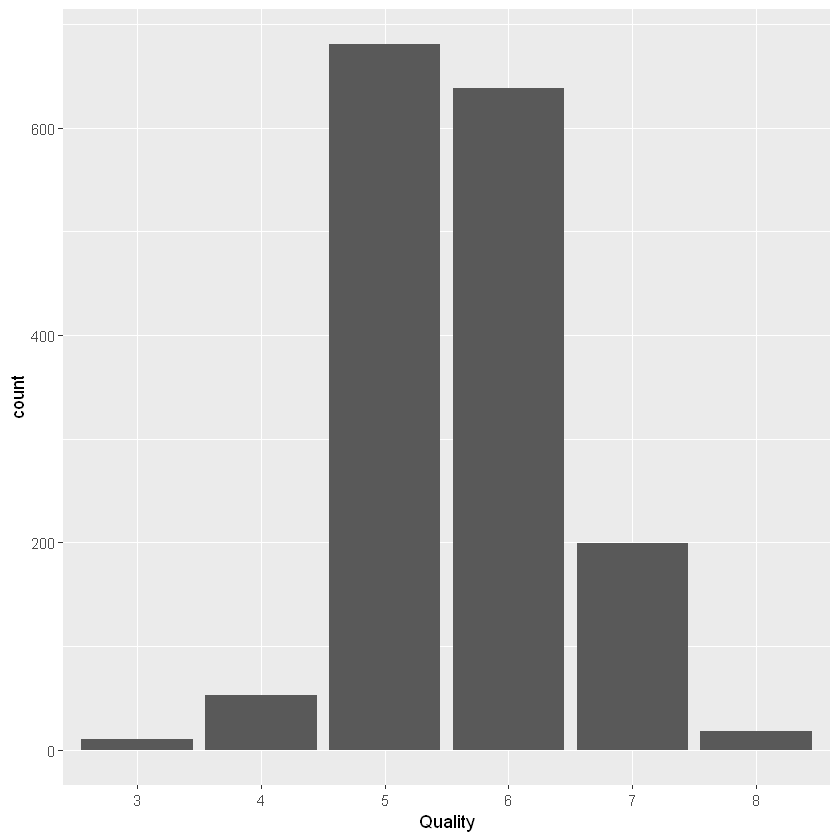

In [3]:
library(ggplot2)
ggplot(aes(x=factor(quality)),data=Wines)+geom_bar()+xlab("Quality")

* The Bar Plot Confirms our assumption that a lot of wines are rated 5 or 6 . Also the no of wines rated other than 5 or 6 are quite low in comparision. This could stand a problem for effective data exploration due to class imbalance

### Intutions

> The attributes present in the Red wine are quite important apart from only a handful of attribute like density and ph which tells more about the chemical struture of liquid than anything

> Second Technically it would be better if we start with alchohol as wine and alchohol are closely related

> It's A standard Practice to complement the non graphical with graphical proof and vice versa

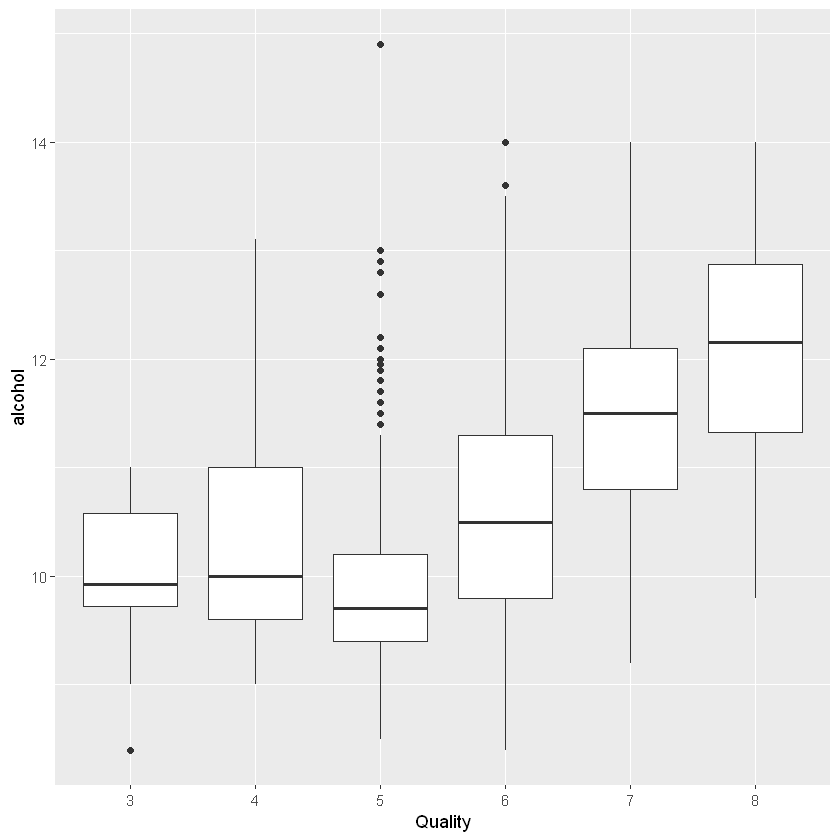

In [4]:
plot <- ggplot(aes(y=alcohol,x=factor(quality)),data=Wines)+geom_boxplot()
plot + xlab("Quality")

**There indeed seems to be a some positive correlation where the higher alcohol content seems to be better rated.**

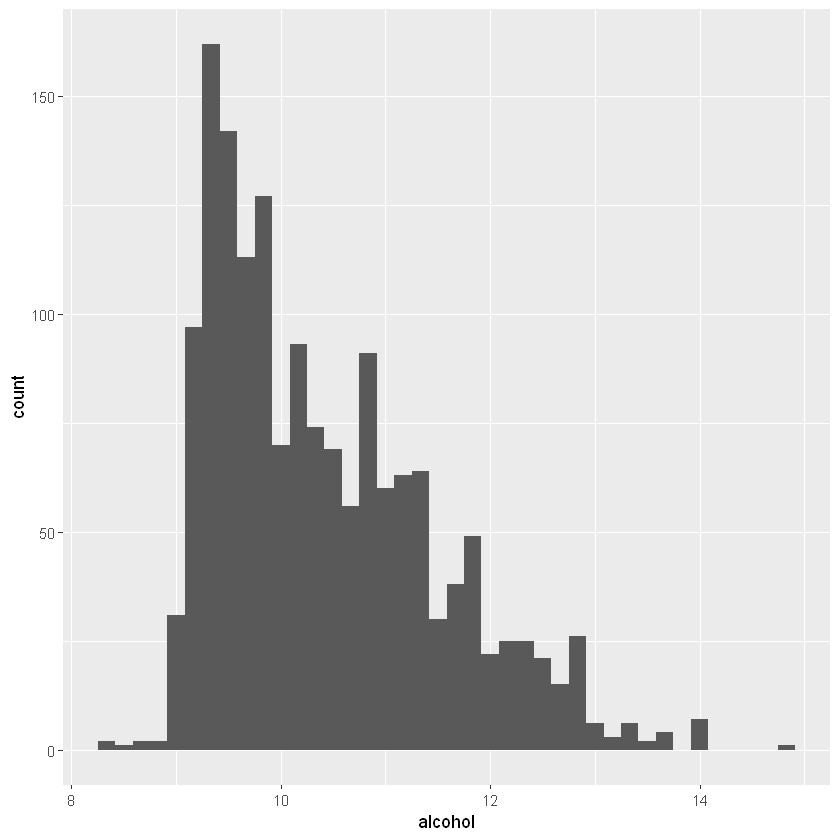

In [5]:
ggplot(aes(x=alcohol),data=Wines)+geom_histogram(bins=40)

The plot is Left skewed. This is important as it tells us the summary stastics that we shoud follow. It also tells us that I should use **Median as the central tendency**

In [11]:
by(Wines$alcohol,Wines$quality,median)

Wines$quality: 3
[1] 9.925
------------------------------------------------------------ 
Wines$quality: 4
[1] 10
------------------------------------------------------------ 
Wines$quality: 5
[1] 9.7
------------------------------------------------------------ 
Wines$quality: 6
[1] 10.5
------------------------------------------------------------ 
Wines$quality: 7
[1] 11.5
------------------------------------------------------------ 
Wines$quality: 8
[1] 12.15

> By Following our intution and proceeding down Just like above i was able to narrow down alcohol content  citric acid and volatle acidity which seems to have some relationship with Quality of Wine

## Bivarate and Multivarate Analysis and Visualization

**Here we look at the data pairwise or if possible in higher dimensions**

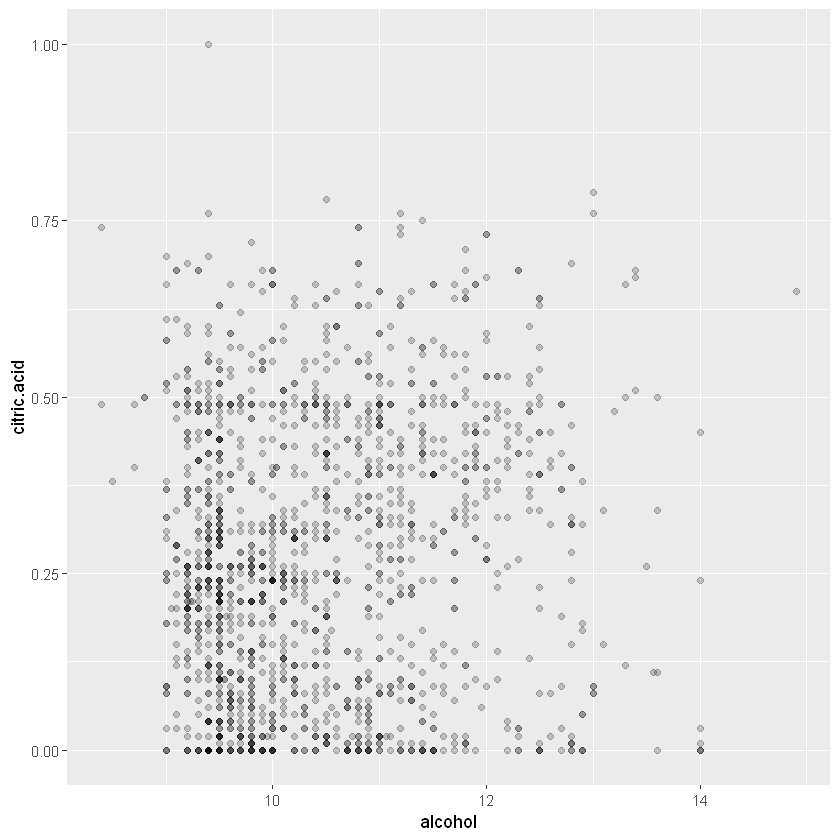

In [13]:
ggplot(aes(x=alcohol,y=citric.acid),data=Wines)+geom_point(alpha=0.2)

* Our Promising attribute citric.acid and alcohol dosent seems to have any kind of relationship whatsoever and there are basically independent to each other

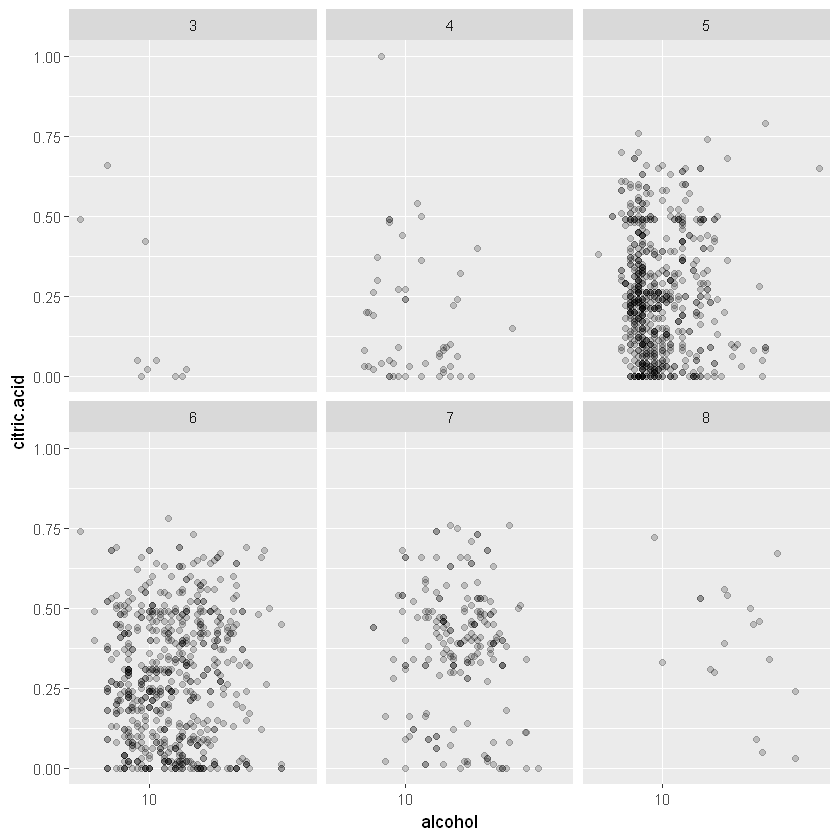

In [6]:
plot <- ggplot(aes(x=alcohol,y=citric.acid),data=Wines)+geom_point(alpha=0.2)
plot + facet_wrap(~quality)+scale_x_log10()

**By Facet wrap it looks like combined higher content of alchol content and citric acid might lead to better Quality of wine . The assumption can be seen if we see the plot for the wine quality rated 5 vs the wine quality rated 7 or 8**

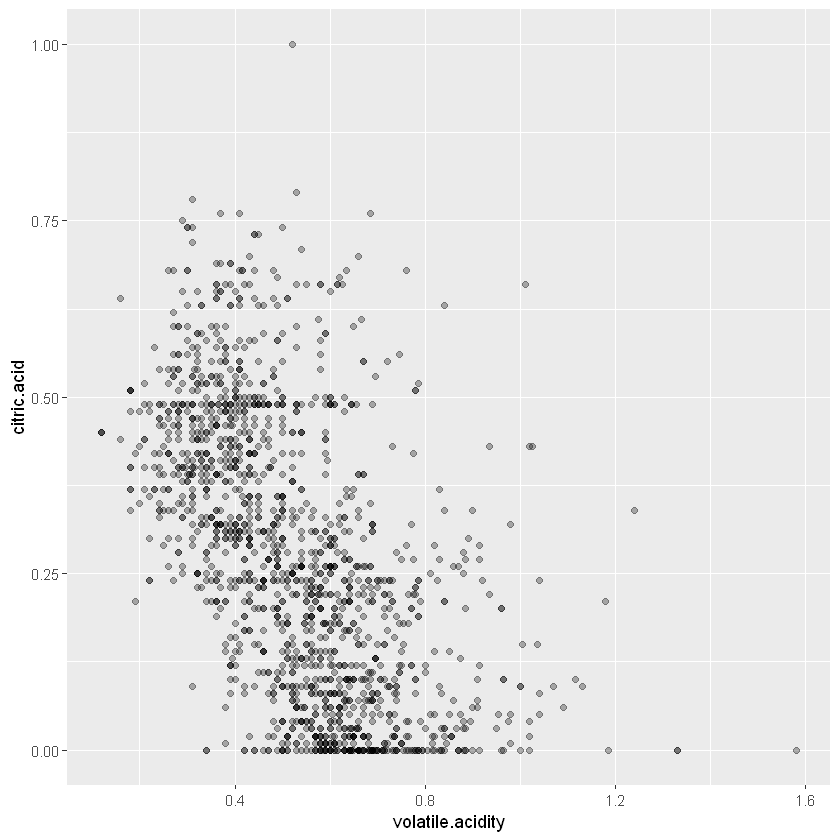

In [7]:
ggplot(aes(x=volatile.acidity,y=citric.acid),data=Wines)+geom_point(alpha=0.3)

* The amount of acetic acid in wine and citric acid seems to negatively correlated . It will be interesting to see what it will tell us about quality of wine

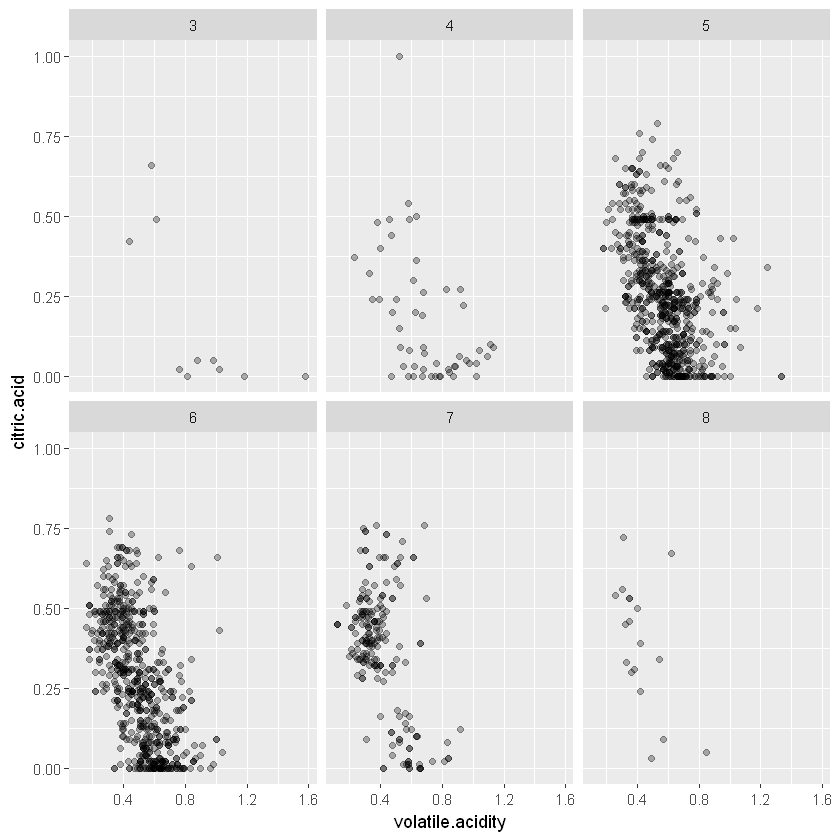

In [21]:
plot <- ggplot(aes(x=volatile.acidity,y=citric.acid),data=Wines)+geom_point(alpha=0.3)
plot + facet_wrap(~quality)

* Generally lower quantity of volatile acidity is preferred along with the substantially higher quantity of citric acid in comparison for the Better quality of wine. But it seems to be standard for a lot of wines in general and not exclusive to wine rated 7 or 8

    Moving on Our Final Plot

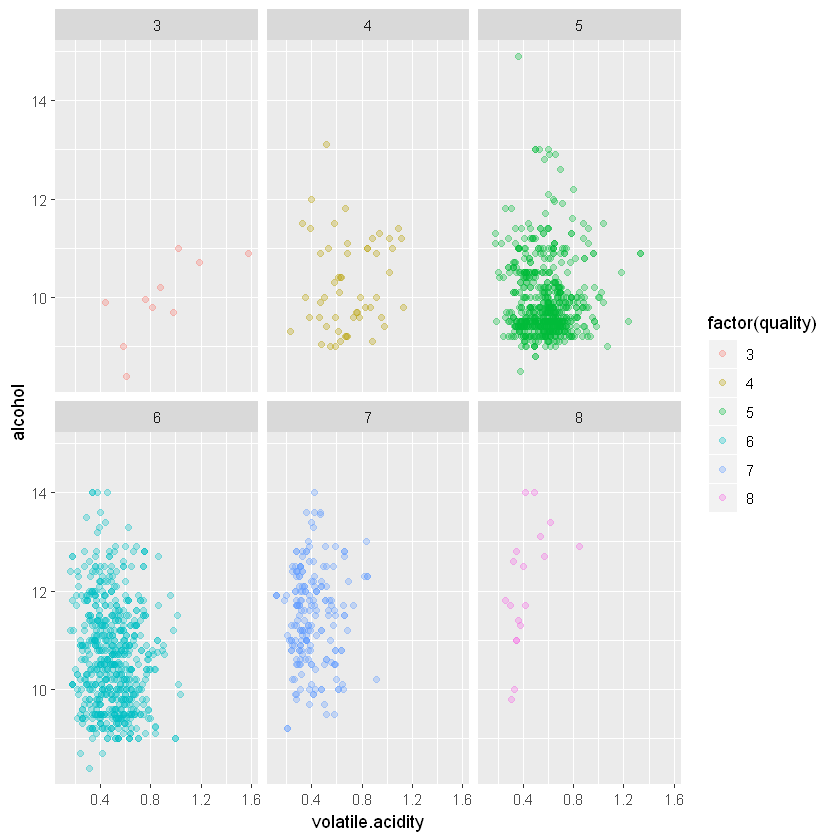

In [22]:
plot <- ggplot(aes(x=volatile.acidity,y=alcohol),data=Wines)
plot +geom_point(aes(color=factor(quality)),alpha=0.3)+facet_wrap(~quality)

**Intrestingly a trend could be seen where the higher quality of alchohol and low quantity of volatile acidity seems to have a better quality wine. Lets cleanse the visualization a little bit by dropping the clustered points and by fitting the line to confirm hypothesis**

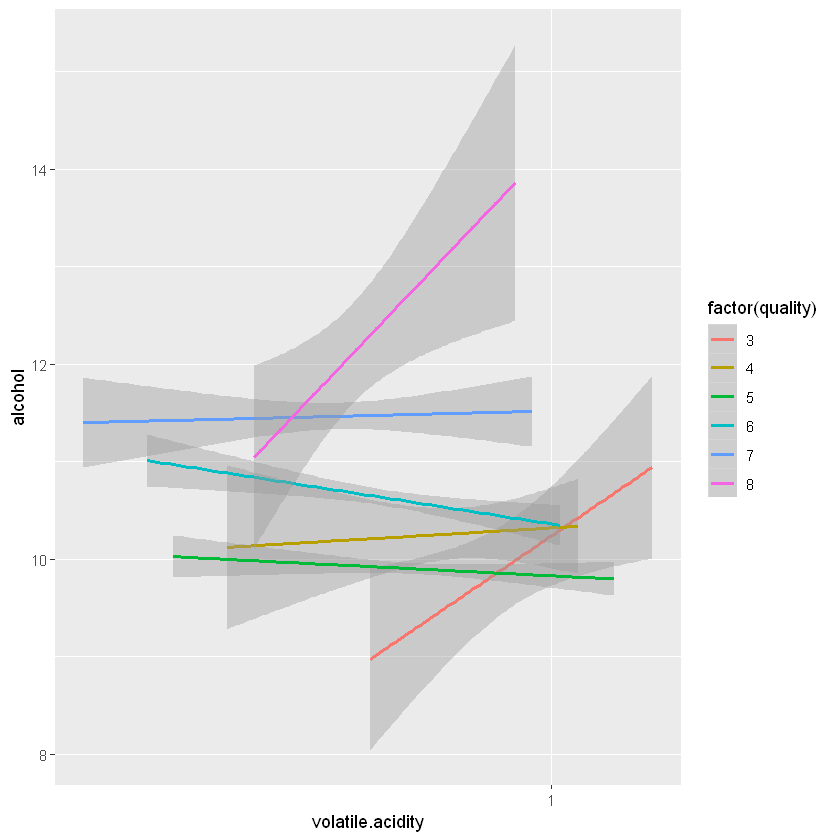

In [25]:
plot <- ggplot(aes(x=volatile.acidity,y=alcohol),data=Wines)
plot <- plot
plot+geom_smooth(method="lm",aes(color=factor(quality)))+scale_x_log10()

**Here a trend could easily be observed where higher quality of alcohol with respect to volatile acidity is considered highly favourable (aka positive slope). The graph is consistent with the above plot where our dataset in which highly rated wine generally have a low volatile acidity and high alcohol content**


## Combining All

**Note: Here You Should Use proper Labelling and Axes as you might want to show it as your final result**


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



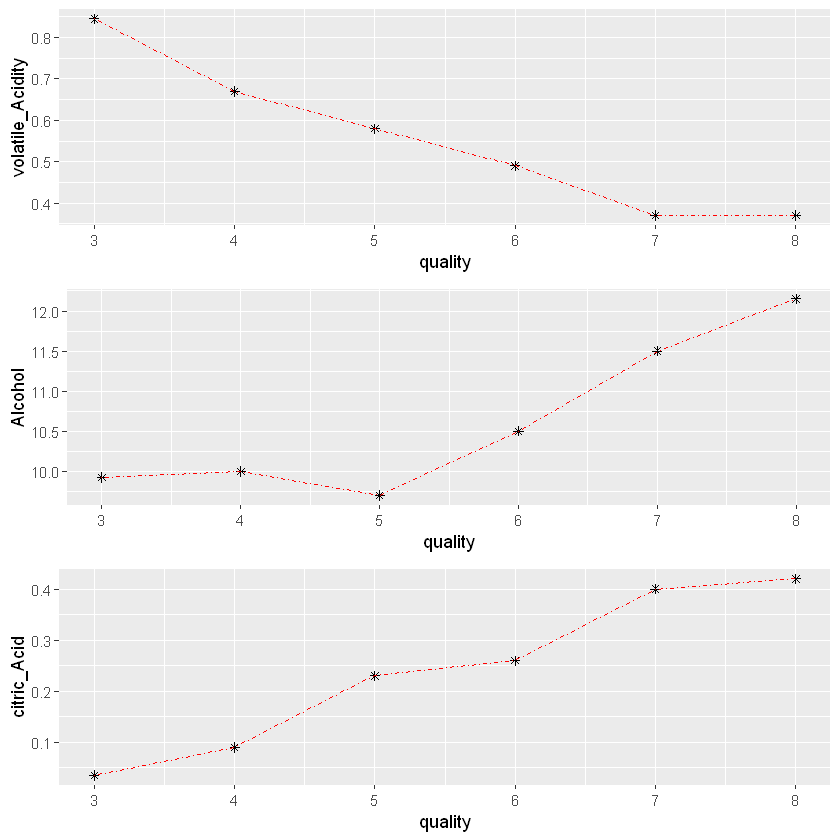

In [27]:
library(dplyr)
library(gridExtra)
group_by(Wines,quality) -> grp



summarise(grp,volatile_Acidity=median(volatile.acidity),Alcohol=median(alcohol)
          ,citric_Acid=median(citric.acid))->Summarise

#---------------------------------------------------------------#
p1 <-ggplot(aes(x=quality,y=volatile_Acidity,group=1),data=Summarise)
p1 <- p1+ geom_point(shape=8)+geom_line(linetype="dotdash",color="red")

p2 <- ggplot(aes(x=quality,y=Alcohol,group=1),data=Summarise)
p2 <- p2 +geom_point(shape=8)+geom_line(linetype="dotdash",color="red")

p3 <- ggplot(aes(x=quality,y=citric_Acid,group=1),data=Summarise)
p3 <- p3 +geom_point(shape=8)+geom_line(linetype="dotdash",color="red")

Combined<- grid.arrange(p1,p2,p3)

> The Final Plot definately shows how volatile acidity is preferred lower for quality while citric acid and alchohol content is preferred higher for good quality wine

### Reflection 

> The dataset consist of the contents and ingrediants of the wine and the rating it got . Much of the attribute was found to have no relation to quality of wine and there are many no of erroneus outliers which brings in to somewhat confusion. In addition the, class imbalance problem also lead to problems in effective data Visualization leading to lot of dead end . Also there was also not a great relationship between the attributes. In the end we were finally able to zero in to about two or three attributes which showed some kind of relationship with the quality.**Bottom line: high amount of alcohol , high amount of citric acid and low amount of volatile acidity is generally considered as most probale way to make a good wine**